In [9]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import mindspore.dataset as ds
import matplotlib.pyplot as plt
import numpy as np
import mindspore.dataset.vision.c_transforms as C
import mindspore.dataset.transforms.c_transforms as C2
from mindspore import dtype as mstype

In [10]:
def visualize(X, y, y_pred, title=None, type='pca'):
    # 可视化,pca降维或者tsne
    if type == 'pca':
        pca = PCA(n_components=2)
        X_dim_reduction = pca.fit_transform(X)

    elif type == 'tsne':
        t_sne = TSNE(n_components=2)
        X_dim_reduction = t_sne.fit_transform(X)
    else:
        X_dim_reduction = X
    # print(X_dim_reduction.shape)
    plt.figure(figsize=(16, 6))

    def get_color(y):
        color_dict = {-1: 'white', 0: 'red', 1: 'orange', 2: 'yellow', 3: 'green', 4: 'magenta', 
                      5: 'blue', 6: 'cyan', 7: 'brown', 8: 'purple', 9: 'aquamarine'}
        color = []
        for i in range(y.shape[0]):
            color.append(color_dict.get(y[i].item(), 'olive'))
        return color
    plt.suptitle(title, fontweight=16)
    plt.subplot(121)
    plt.title('origin data')
    #使用降维后的两个维度进行绘图
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y), edgecolors='black')
    plt.subplot(122)
    plt.title('cluster result')
    plt.scatter(X_dim_reduction[:, 0], X_dim_reduction[:, 1], c=get_color(y_pred), edgecolors='black')
    plt.show()

In [11]:
def get_dataset_cifar(split):
    data_path = './datasets/cifar10/' + split
    dataset = ds.Cifar10Dataset(data_path)
    #归一化
    c_trans = []
    c_trans += [
        C.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010]),
        C.HWC2CHW()
    ]
    dataset = dataset.map(operations=c_trans, input_columns="image", num_parallel_workers=8)
    
    #获取迭代器
    dataset = dataset.batch(1)
    iterator_show = dataset.create_dict_iterator()
    class_a_num = 0
    class_b_num = 0
    class_c_num = 0
    x = []
    y = []
    
    #numpy 数据处理
    while class_a_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 0:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_a_num += 1
    while class_b_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 5:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_b_num += 1
    while class_c_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 9:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_c_num += 1
    x = np.array(x)
    y = np.array(y)
    print("x.shape:")
    print(x.shape)
    print("y.shape:")
    print(y.shape)
    return x, y

In [12]:
def get_dataset_MNIST(split):
    data_path = './datasets/MNIST_Data/' + split
    dataset = ds.MnistDataset(data_path)
    class_a_num = 0
    class_b_num = 0
    class_c_num = 0
    class_d_num = 0
    class_e_num = 0
    x = []
    y = []
    #归一化
    c_trans = [
        C.Rescale(1.0 / 255.0, 0),
        C.Normalize(mean=(0.1307,), std=(0.3081,)),
        C.HWC2CHW()
    ]
    dataset = dataset.map(operations=c_trans, input_columns="image", num_parallel_workers=8)
    #获取迭代器
    dataset = dataset.batch(1)
    iterator_show = dataset.create_dict_iterator()
    #numpy 数据处理
    while class_a_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 0:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_a_num += 1
    while class_b_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 5:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_b_num += 1
    while class_c_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 9:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_c_num += 1
    while class_d_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 1:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_d_num += 1
    while class_e_num < 500:
        data = next(iterator_show)
        if data["label"].asnumpy() == 7:
            x.append(data["image"].reshape(-1).asnumpy())
            y.append(data["label"].asnumpy())
            class_e_num += 1
    x = np.array(x)
    y = np.array(y)
    print("x.shape:")
    print(x.shape)
    print("y.shape:")
    print(y.shape)
    return x, y

In [15]:
x1,y1=get_dataset_cifar("train")
x2,y2=get_dataset_MNIST("train")

x.shape:
(1500, 3072)
y.shape:
(1500, 1)
x.shape:
(2500, 784)
y.shape:
(2500, 1)


In [16]:
print(x1[1:10])
print(x2[1:10])

[[ 813.1913   813.1913   813.1913  ...  793.7985   793.7985   793.7985 ]
 [1253.132   1238.3025  1238.3025  ... 1246.5348  1246.5348  1261.4601 ]
 [1144.3826  1119.6669  1119.6669  ... 1171.9078  1171.9078  1206.7338 ]
 ...
 [ 674.783    689.6124   704.4419  ...  445.53976  475.39053  460.46515]
 [ 640.1809   605.57886  566.0336  ...  525.1418   520.1667   564.9428 ]
 [ 650.0672   645.1241   645.1241  ... 1246.5348  1246.5348  1231.6094 ]]
[[-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 ...
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]
 [-0.42421296 -0.42421296 -0.42421296 ... -0.42421296 -0.42421296
  -0.42421296]]


In [17]:
class MYKMeans:
    def __init__(self,n_clusters=5,max_iter=1000):
        self._n_clusters=n_clusters
        self._X=None
        self._y=None
        self._center = None
        self._max_iter=max_iter
        
    def fit(self,X):
        self._X=X
        n=X.shape[0]
        d=X.shape[1]
        #随机生成中心点
        self._center = np.array([[np.random.uniform(mi,mx) for mi,mx in zip(X.min(axis=0),X.max(axis=0))] for _ in range(self._n_clusters)])
        step=0
        #迭代
        while step < self._max_iter:
            #求样本点与每个中心点的距离
            distances = np.array([np.sum((X-self._center[i,:])**2,axis=1) for i in range(self._n_clusters)])
            #样本距离哪个最近中心点
            self._y = np.argmin(distances.T,axis=1)
            #对样本点加权平均计算新的中心点
            self._center = np.array([np.mean(X[self._y==i,:],axis=0) for i in range(self._n_clusters)])
            step+=1
        y_pred = np.zeros(n)
        #确定每个点的标签
        for i in range(n):
            best_distance = np.inf
            best_y_pred = 0
            for j in range(self._n_clusters):
                distance = np.sum((X[i,:]-self._center[j,:])**2)
                if distance < best_distance:
                    best_distance = distance
                    best_y_pred = j
            y_pred[i]=best_y_pred
        return y_pred

In [18]:
K_means_preds=K_means_cluster(x2)
visualize(x2,y2,K_means_preds,title='K-means')

NameError: name 'K_means_cluster' is not defined

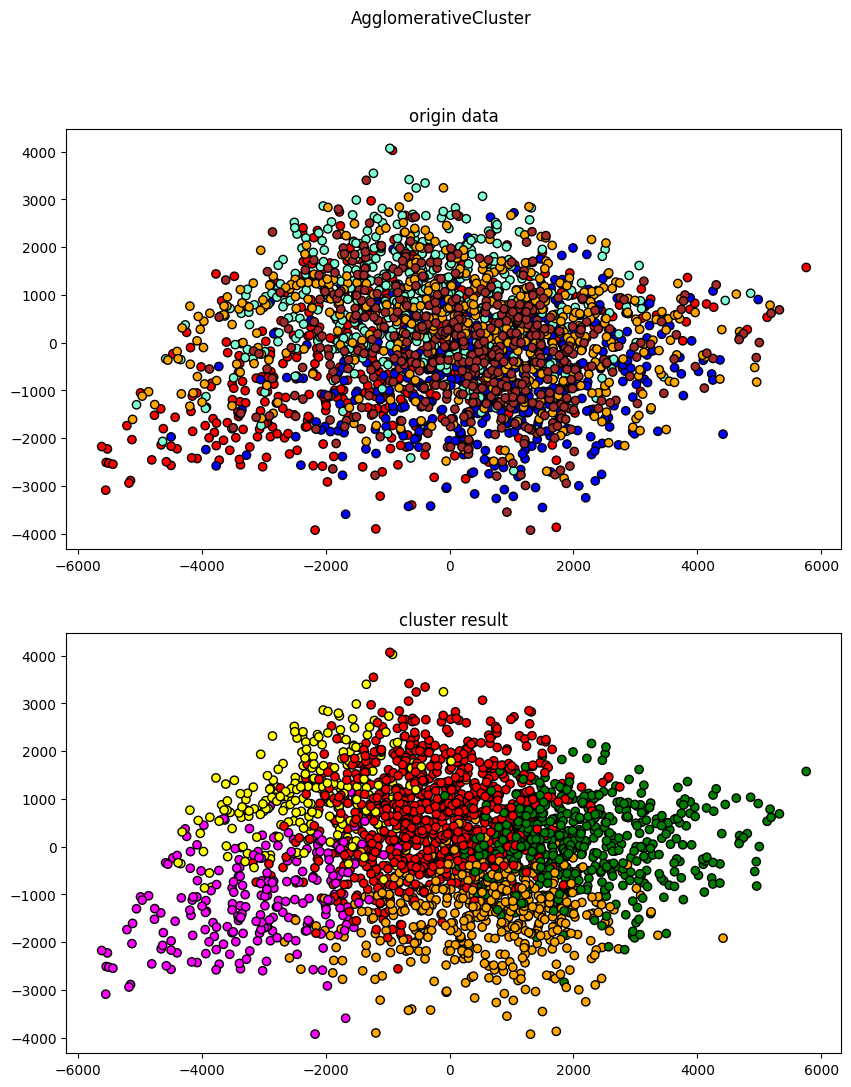

In [91]:
Agglomerative_preds=Agglomerative_cluster(x1)
visualize(x1,y1,Agglomerative_preds,title='AgglomerativeCluster')

In [ ]:
# tsne降维
# t_sne = TSNE(n_components=2)
# x_lower = t_sne.fit_transform(x)
# pca降维
# pca = PCA(n_components=500)
# x_lower = pca.fit_transform(x)
# 不降维
# x_lower = x

In [19]:
#pca 降维
pca = PCA(n_components=2)
x2_lower_pca = pca.fit_transform(x2)
#tsne 降维
t_sne = TSNE(n_components=2)
x1_lower_tsne = t_sne.fit_transform(x1)

In [20]:
print('x2_lower.pca.shape')
print(x2_lower_pca.shape)
print('x1_lower.tsne.shape')
print(x1_lower_tsne.shape)

x2_lower.pca.shape
(2500, 2)
x1_lower.tsne.shape
(1500, 2)


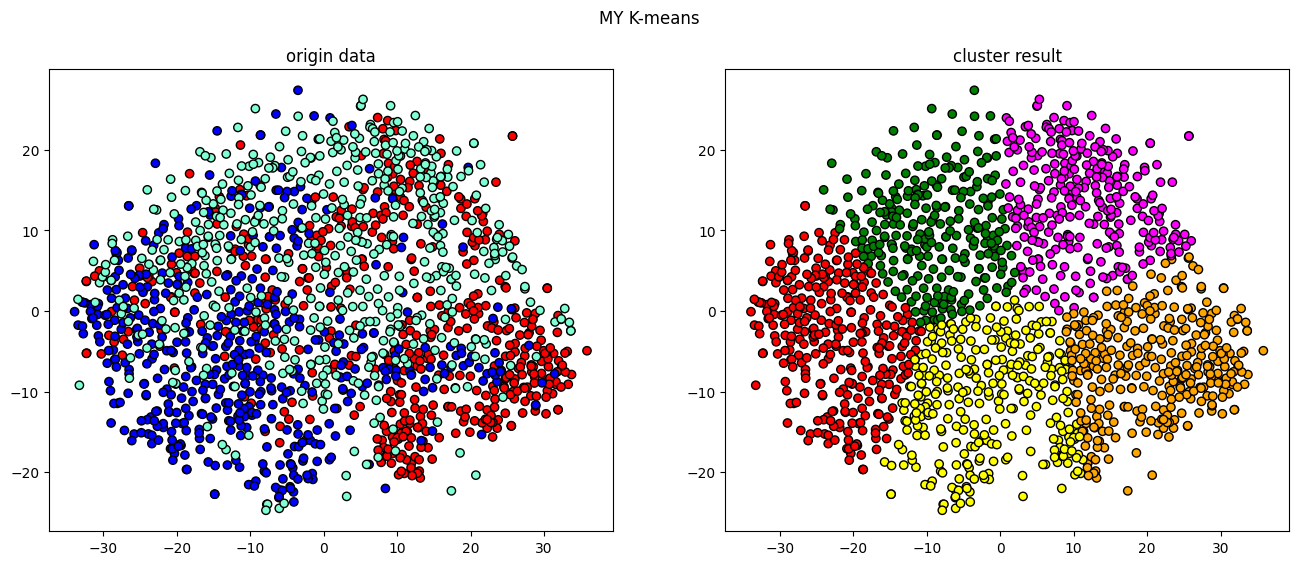

In [21]:
K_means=MYKMeans(n_clusters=5)
y_pred = K_means.fit(x1_lower_tsne)
visualize(x1_lower_tsne,y1,y_pred,title='MY K-means')

In [38]:
KMeans(n_clusters=5).fit(x1_lower_tsne)
visualize(x1,y1,K_means_preds,title='K-means')

AttributeError: type object 'KMeans' has no attribute 'fit_predict'

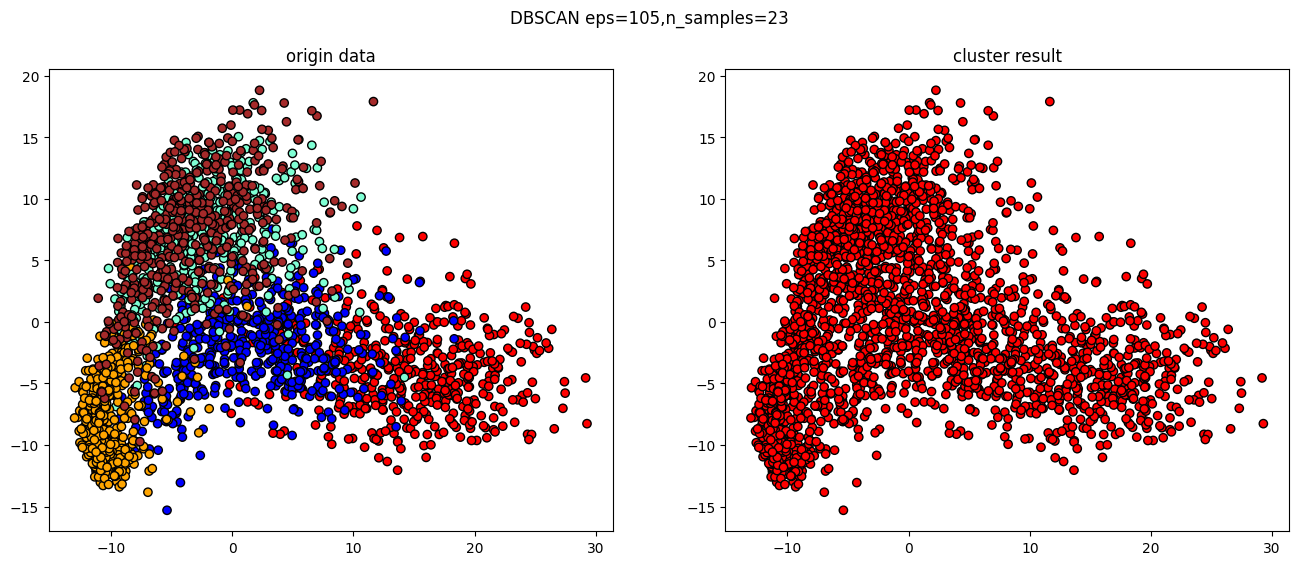

In [22]:
eps = 105
n_samples = 23
DBSCAN_preds=DBSCAN(eps=eps, min_samples=n_samples).fit_predict(x2_lower_pca)
visualize(x2_lower_pca,y2,DBSCAN_preds,title=f'DBSCAN eps={eps},n_samples={n_samples}')

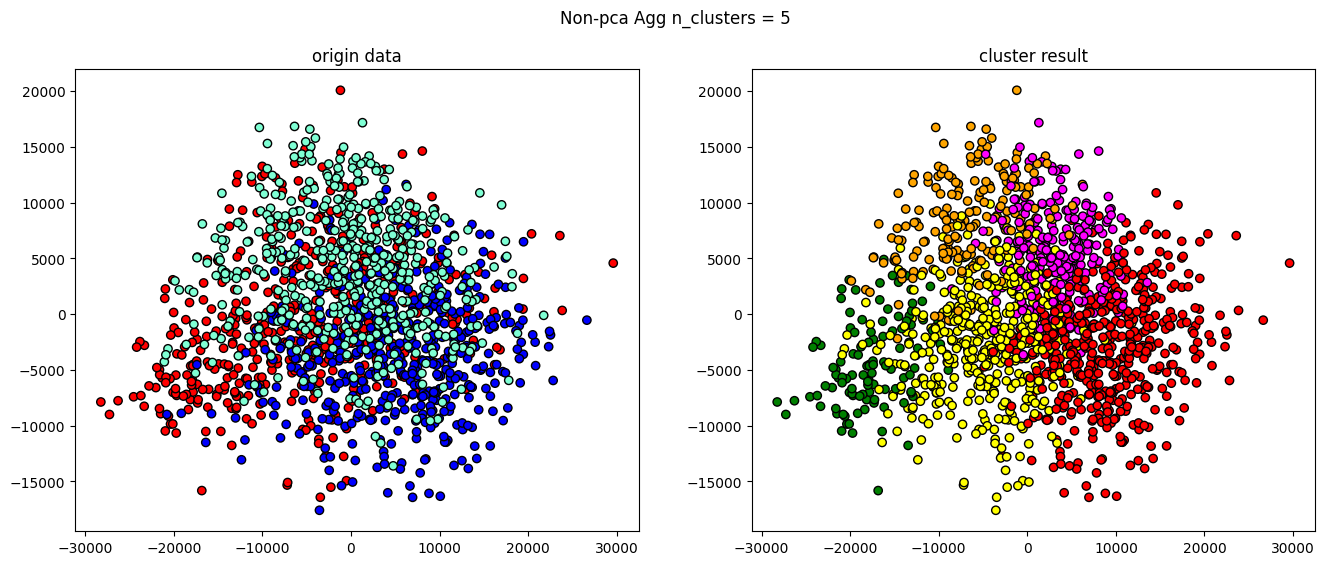

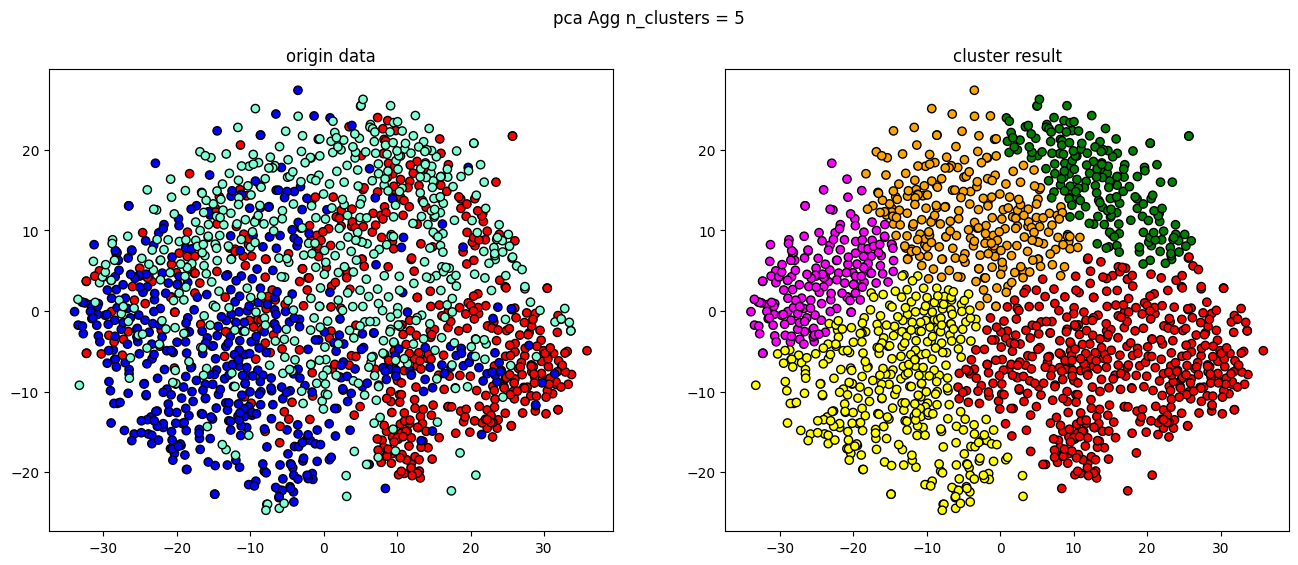

In [23]:
n_clusters = 5
ypreds_Agglomerative_pca_lower = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(x1_lower_tsne)
Agglomerative_preds = AgglomerativeClustering(n_clusters=n_clusters).fit_predict(x1)
visualize(x1,y1,Agglomerative_preds,title=f'Non-pca Agg n_clusters = {n_clusters}')
visualize(x1_lower_tsne,y1,ypreds_Agglomerative_pca_lower,title=f'pca Agg n_clusters = {n_clusters}')